<a href="https://colab.research.google.com/github/Pathooo/R/blob/main/Life_R.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
%load_ext rpy2.ipython

***Installing and Loading Packages***

In [ ]:
%%R
install.packages('GGally')
install.packages("glmnet")
install.packages('pls')
install.packages("randomForest")
library(glmnet)
library(randomForest)
library(pls)
library(repr)
library(tidyverse)
library(tibble)
library(GGally)
set.seed(100)

***Importing Data***

In [ ]:
%%R
df<-read.csv(file="LFE.csv",header=TRUE)
df<-as_tibble(df)
glimpse(df)

Rows: 2,938
Columns: 22
$ Country                         <chr> "Afghanistan", "Afghanistan", "Afghani…
$ Year                            <int> 2015, 2014, 2013, 2012, 2011, 2010, 20…
$ Status                          <chr> "Developing", "Developing", "Developin…
$ Life.expectancy                 <dbl> 65.0, 59.9, 59.9, 59.5, 59.2, 58.8, 58…
$ Adult.Mortality                 <int> 263, 271, 268, 272, 275, 279, 281, 287…
$ infant.deaths                   <int> 62, 64, 66, 69, 71, 74, 77, 80, 82, 84…
$ Alcohol                         <dbl> 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.…
$ percentage.expenditure          <dbl> 71.279624, 73.523582, 73.219243, 78.18…
$ Hepatitis.B                     <int> 65, 62, 64, 67, 68, 66, 63, 64, 63, 64…
$ Measles                         <int> 1154, 492, 430, 2787, 3013, 1989, 2861…
$ BMI                             <dbl> 19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16…
$ under.five.deaths               <int> 83, 86, 89, 93, 97, 102, 106, 110, 113…
$ Polio         

In [ ]:
%%R
options(tibble.width = Inf) 
df

# A tibble: 2,938 × 22
   Country      Year Status     Life.expectancy Adult.Mortality infant.deaths
   <chr>       <int> <chr>                <dbl>           <int>         <int>
 1 Afghanistan  2015 Developing            65               263            62
 2 Afghanistan  2014 Developing            59.9             271            64
 3 Afghanistan  2013 Developing            59.9             268            66
 4 Afghanistan  2012 Developing            59.5             272            69
 5 Afghanistan  2011 Developing            59.2             275            71
 6 Afghanistan  2010 Developing            58.8             279            74
 7 Afghanistan  2009 Developing            58.6             281            77
 8 Afghanistan  2008 Developing            58.1             287            80
 9 Afghanistan  2007 Developing            57.5             295            82
10 Afghanistan  2006 Developing            57.3             295            84
   Alcohol percentage.expenditure Hepatit

***Remname Columns to more appropriate and usable names***

In [ ]:
%%R
df<-df %>% rename(life_expectancy= Life.expectancy,
                  adult_mortality= Adult.Mortality,
                  income= Income.composition.of.resources,
                  thinness_9= thinness.5.9.years,
                  thinness_19=thinness..1.19.years,
                  aids=HIV.AIDS,
                  expenditure= Total.expenditure,
                  fatality_under_5=under.five.deaths,
                  hepatitis_b= Hepatitis.B,
                  infant_mortality=infant.deaths,
                  expenditure_percent=percentage.expenditure)

df<- df %>% rename_with(tolower)

In [ ]:
%%R
glimpse(df)

Rows: 2,938
Columns: 22
$ country             <chr> "Afghanistan", "Afghanistan", "Afghanistan", "Afgh…
$ year                <int> 2015, 2014, 2013, 2012, 2011, 2010, 2009, 2008, 20…
$ status              <chr> "Developing", "Developing", "Developing", "Develop…
$ life_expectancy     <dbl> 65.0, 59.9, 59.9, 59.5, 59.2, 58.8, 58.6, 58.1, 57…
$ adult_mortality     <int> 263, 271, 268, 272, 275, 279, 281, 287, 295, 295, …
$ infant_mortality    <int> 62, 64, 66, 69, 71, 74, 77, 80, 82, 84, 85, 87, 87…
$ alcohol             <dbl> 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.01, 0.03, 0.…
$ expenditure_percent <dbl> 71.279624, 73.523582, 73.219243, 78.184215, 7.0971…
$ hepatitis_b         <int> 65, 62, 64, 67, 68, 66, 63, 64, 63, 64, 66, 67, 65…
$ measles             <int> 1154, 492, 430, 2787, 3013, 1989, 2861, 1599, 1141…
$ bmi                 <dbl> 19.1, 18.6, 18.1, 17.6, 17.2, 16.7, 16.2, 15.7, 15…
$ fatality_under_5    <int> 83, 86, 89, 93, 97, 102, 106, 110, 113, 116, 118, …
$ polio         

***Percentage Of Missing Values***

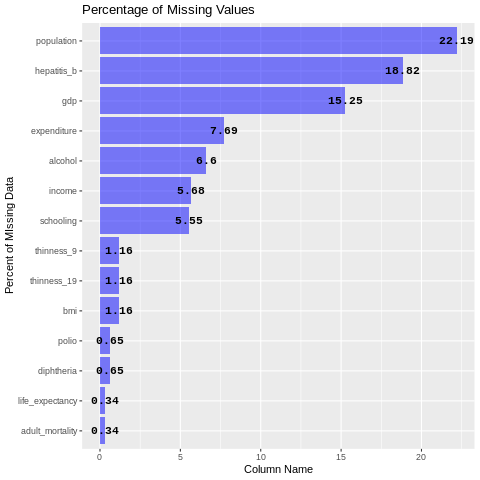

In [ ]:
%%R
missing<- function(vector){
    y<-length(vector)
    x<- ifelse(is.na(vector)|vector == ""|is.null(vector), TRUE, FALSE)
    return ((sum(x)/y)*100)
}

missingvals<-tibble(variable=colnames(df),
       missing=sapply(df,missing))
missingvals$missing<-round(missingvals$missing,2)
missingvals %>% filter(missing>0) %>% ggplot(aes(x=reorder(variable,missing),y=missing))+ geom_col(alpha=0.5,fill="blue") + coord_flip()+ ggtitle("Percentage of Missing Values")+ geom_text(aes(label = missing),  size = 4, fontface = "bold", family = "Fira Sans") + xlab("Percent of MIssing Data") +ylab("Column Name")



***Removing Null Values***

In [ ]:
%%R
df<-na.omit(df)
summary(df)

   country               year         status          life_expectancy
 Length:1649        Min.   :2000   Length:1649        Min.   :44.0   
 Class :character   1st Qu.:2005   Class :character   1st Qu.:64.4   
 Mode  :character   Median :2008   Mode  :character   Median :71.7   
                    Mean   :2008                      Mean   :69.3   
                    3rd Qu.:2011                      3rd Qu.:75.0   
                    Max.   :2015                      Max.   :89.0   
 adult_mortality infant_mortality     alcohol       expenditure_percent
 Min.   :  1.0   Min.   :   0.00   Min.   : 0.010   Min.   :    0.00   
 1st Qu.: 77.0   1st Qu.:   1.00   1st Qu.: 0.810   1st Qu.:   37.44   
 Median :148.0   Median :   3.00   Median : 3.790   Median :  145.10   
 Mean   :168.2   Mean   :  32.55   Mean   : 4.533   Mean   :  698.97   
 3rd Qu.:227.0   3rd Qu.:  22.00   3rd Qu.: 7.340   3rd Qu.:  509.39   
 Max.   :723.0   Max.   :1600.00   Max.   :17.870   Max.   :18961.35   
  hepa

***Categorical Encoding***

In [ ]:
%%R
df<-df %>% mutate(status=replace(status,status=="Developing",0))
df<-df %>% mutate(status=replace(status,status=="Developed",1))
print(unique(df["status"]))

# A tibble: 2 × 1
  status
  <chr> 
1 0     
2 1     


***Splitting into Train and Test***

In [ ]:
%%R
n<-nrow(df)
train_rows<-sample(1:n,0.66*n)
model_df<-df[train_rows,]
df1<-df[train_rows,]
y<-df["life_expectancy"]
x<-df %>% select(-life_expectancy)
x_train<-x[train_rows,]
x_test<-x[-train_rows,]
y_train<-y[train_rows,1]
y_test<-y[-train_rows,1]

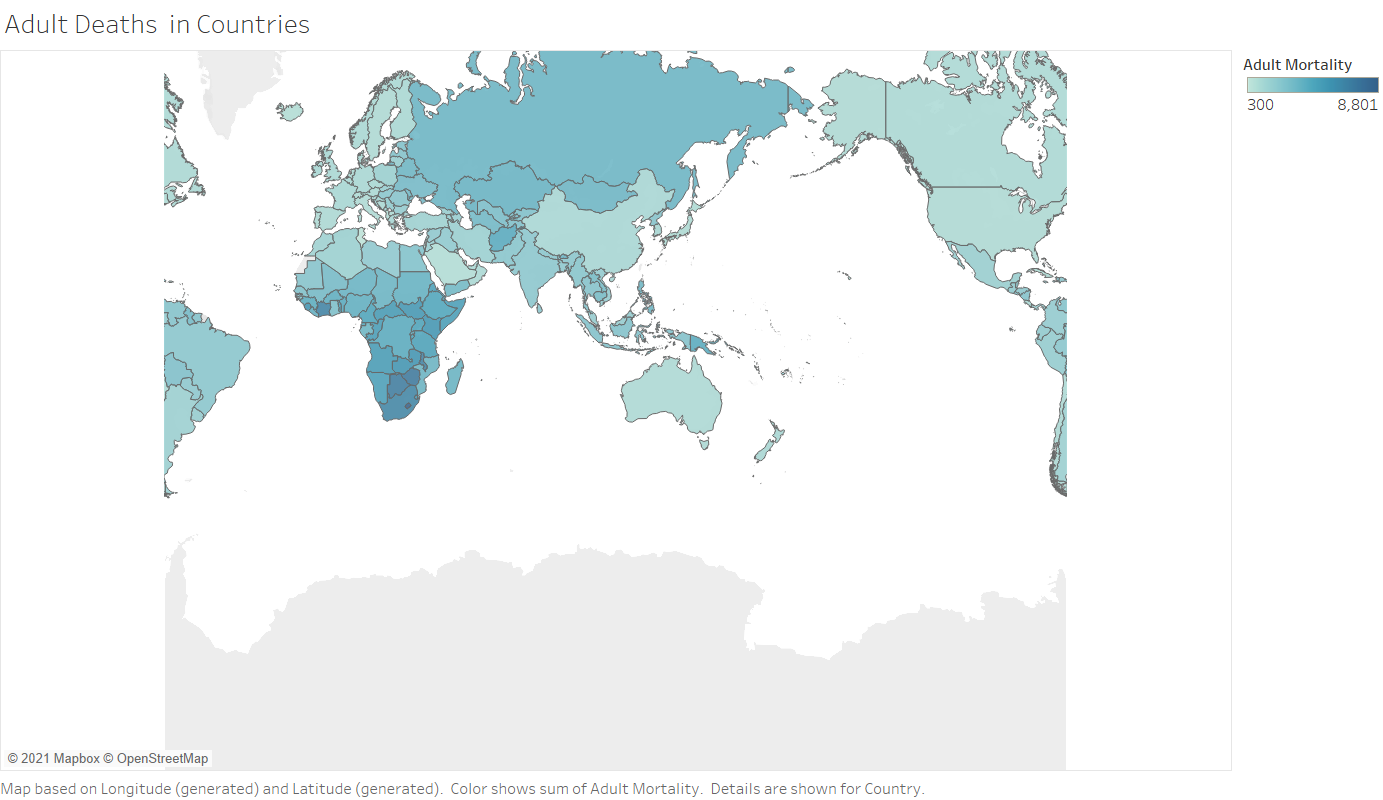

***Plotting and And Exloring Data***

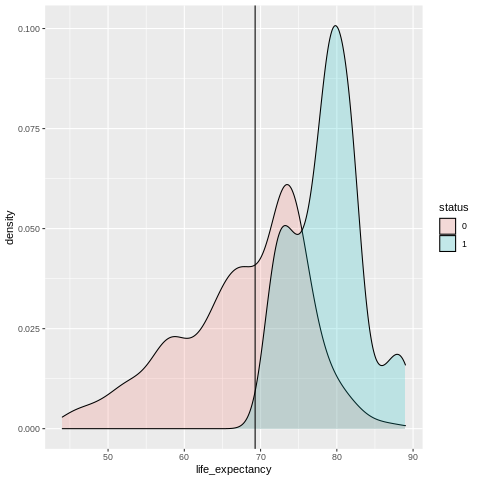

In [ ]:
%%R
df1 %>% ggplot(aes(x=life_expectancy,fill=status))+geom_density(alpha=0.2)+geom_vline(xintercept=mean(df1$life_expectancy))

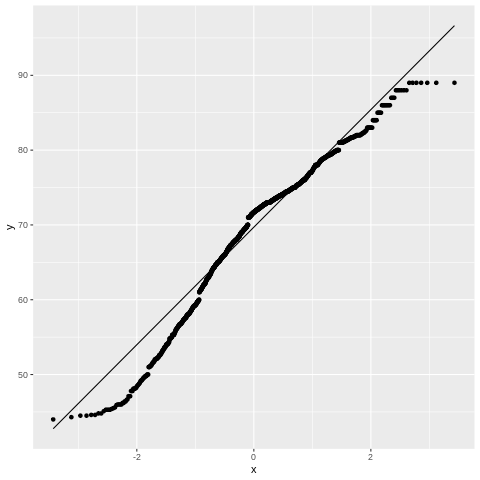

In [ ]:
%%R
ggplot(df, aes(sample = life_expectancy)) + stat_qq() + stat_qq_line()

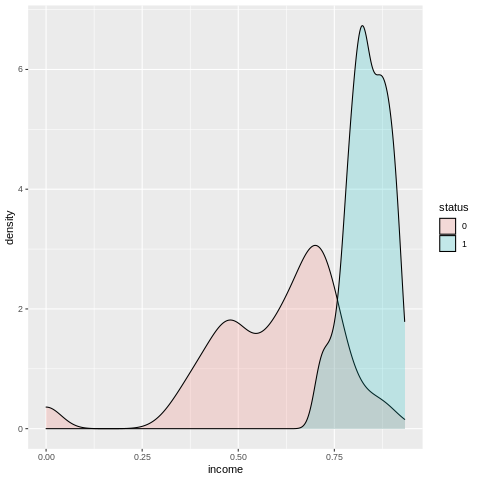

In [ ]:
%%R
df1 %>% ggplot(aes(x=income,fill=status))+geom_density(alpha=0.2)

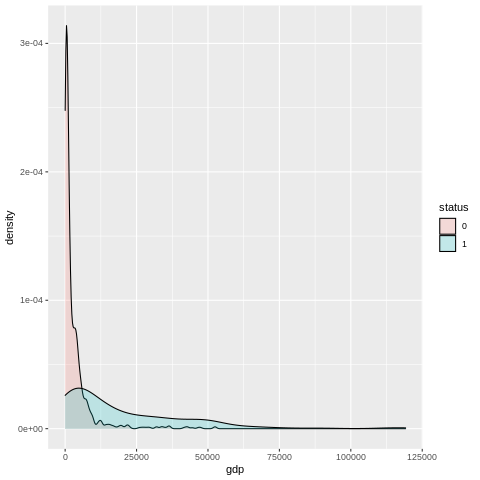

In [ ]:
%%R
df1 %>% ggplot(aes(x=gdp,fill=status))+geom_density(alpha=0.2)

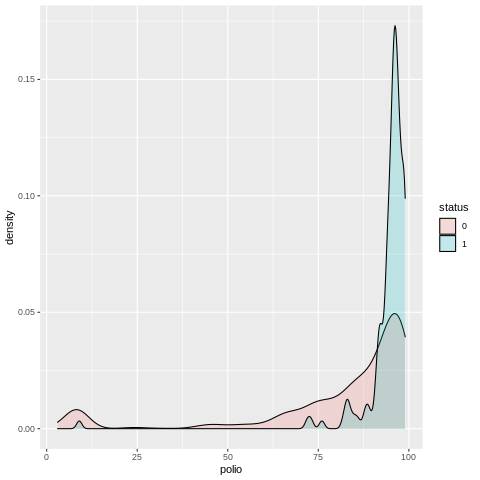

In [ ]:
%%R
df1 %>% ggplot(aes(x=polio,fill=status))+geom_density(alpha=0.2)

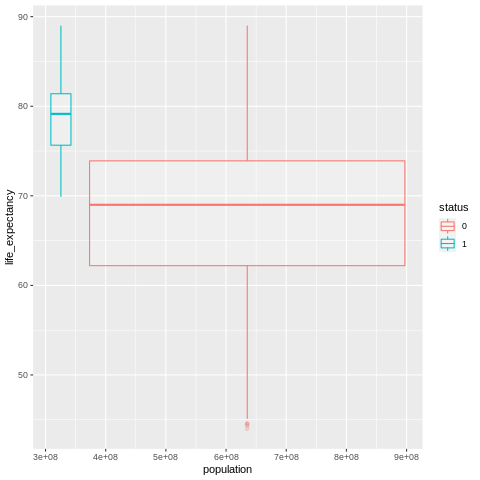

In [ ]:
%%R
df1 %>% ggplot(aes(x=population,y=life_expectancy))+geom_boxplot(aes(colour=status,group=status),alpha=0.2)

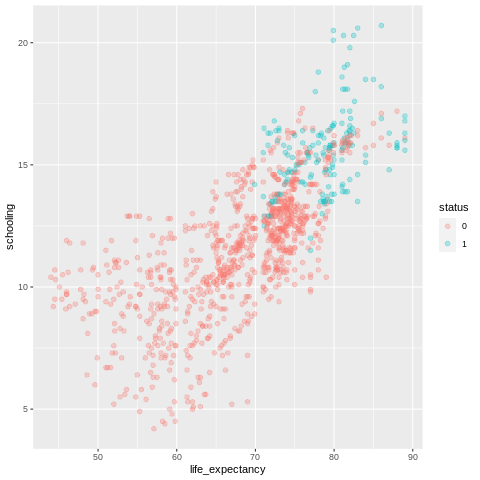

In [ ]:
%%R
df1 %>% ggplot(aes(x=life_expectancy,y=schooling)) + geom_point(aes(color=status),size=2,alpha=0.3)

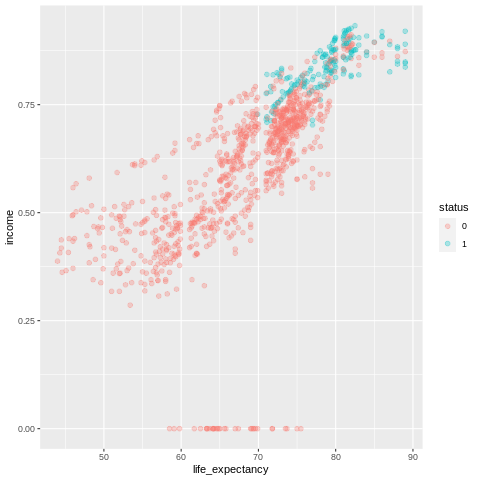

In [ ]:
%%R
df1 %>% ggplot(aes(x=life_expectancy,y=income)) + geom_point(aes(color=status),size=2,alpha=0.3)

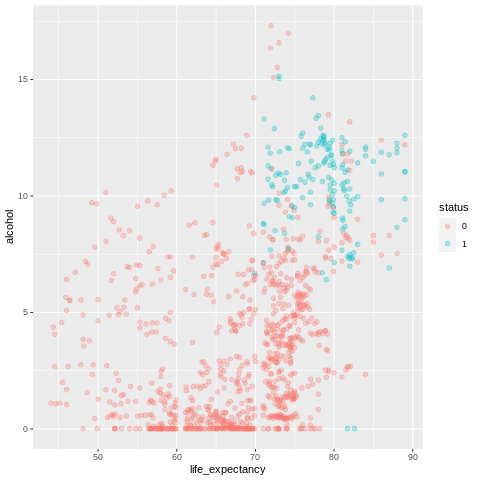

In [ ]:
%%R
df1 %>% ggplot(aes(x=life_expectancy,y=alcohol)) + geom_point(aes(color=status),size=2,alpha=0.3)

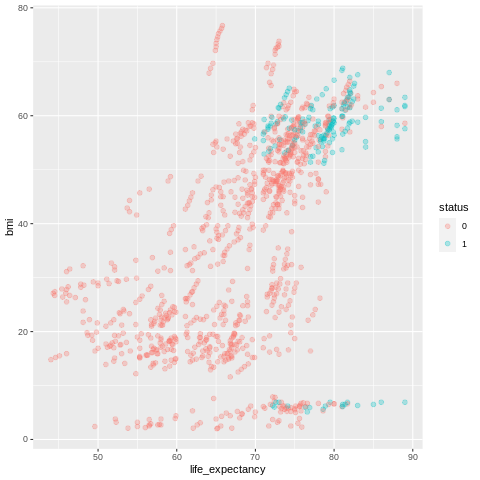

In [ ]:
%%R
df1 %>% ggplot(aes(x=life_expectancy,y=bmi)) + geom_point(aes(color=status),size=2,alpha=0.3)

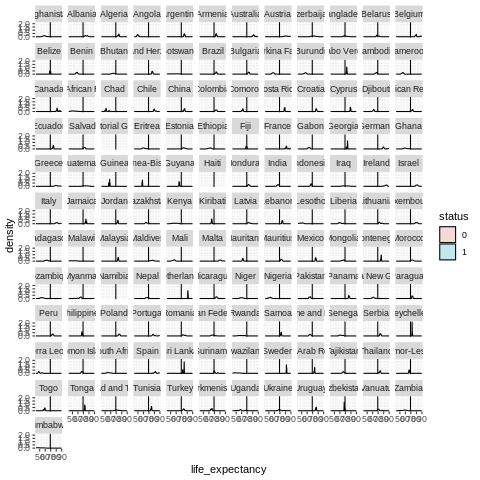

In [ ]:
%%R
df1 %>% ggplot(aes(x=life_expectancy,fill=status))+geom_density(alpha=0.2)+geom_vline(xintercept=mean(df1$life_expectancy))+facet_wrap(~ country)

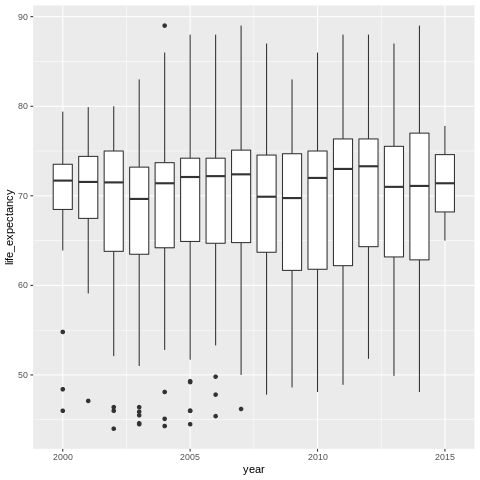

In [ ]:
%%R
df1 %>% ggplot(aes(x=year,y=life_expectancy))+geom_boxplot(aes(group=year))

R[write to console]: `geom_smooth()` using method = 'gam' and formula 'y ~ s(x, bs = "cs")'



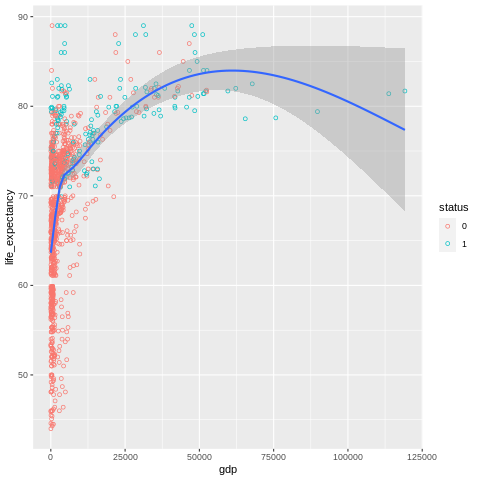

In [ ]:
%%R
df1 %>% ggplot(aes(x=gdp,y=life_expectancy))+geom_point(aes(color=status),pch=21)+geom_smooth()

R[write to console]: Scale for 'colour' is already present. Adding another scale for 'colour',
which will replace the existing scale.



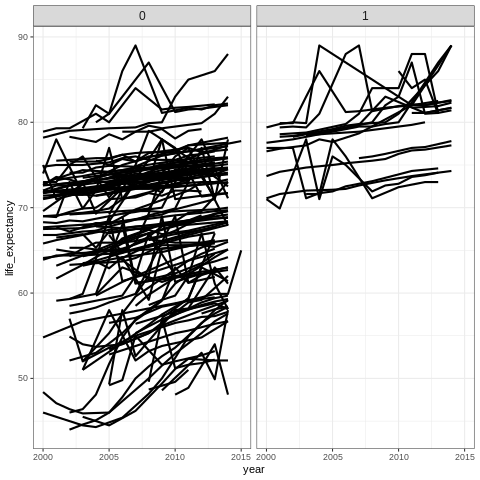

In [ ]:
%%R

ggplot(df1,aes(x = year, y = life_expectancy, group = country)) +
  geom_line(lwd = 1, show_guide = FALSE) + facet_wrap(~ status) +
  scale_color_manual()  +
  scale_color_brewer()+
  theme_bw() + theme(strip.text = element_text(size = rel(1.1)))

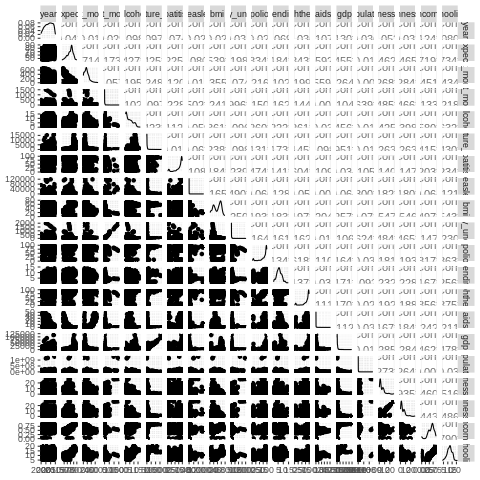

In [ ]:
%%R
options(repr.plot.width=20, repr.plot.height=20)
ggpairs(select(df1,-c("status","country")))


***Correlation Matrix***

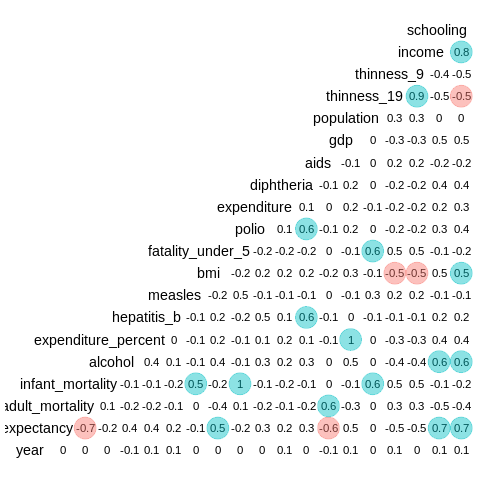

In [ ]:
%%R
options(repr.plot.width=10, repr.plot.height=10)
ggcorr(select(df1,-c("status","country")),method=c("everything", "pearson"),label=TRUE, hjust = 0.9,geom="blank", size = 5,layout.exp = 1)+
geom_point(size = 10, aes(color = coefficient > 0, alpha = abs(coefficient) > 0.5)) +
  scale_alpha_manual(values = c("TRUE" = 0.45, "FALSE" = 0)) +
  guides(color = FALSE, alpha = FALSE)

In [ ]:
%%R
df2<- model_df %>% select(-c("infant_mortality", "expenditure_percent","thinness_9"))

***Principal Component Analysis***

In [ ]:
%%R
 pca<-prcomp(select(df2,-c("status","country","life_expectancy")),scale=TRUE)
 pca.var<-pca$sdev^2
 pca.var.per<-round(pca.var/sum(pca.var)*100)


***Variance provides by the Principal Components***

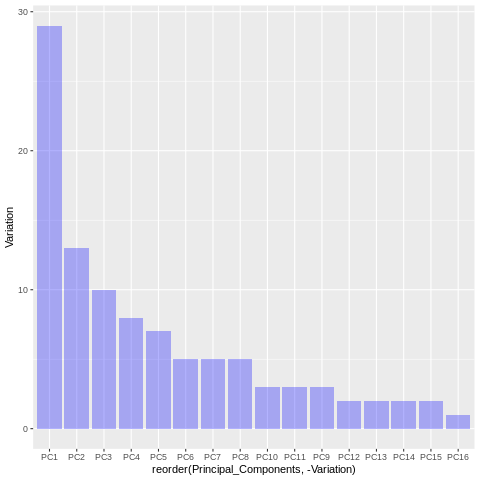

In [ ]:
%%R
 scree<-tibble(Principal_Components=paste0("PC",1:length(pca.var.per)),
               Variation=pca.var.per)
 scree %>% ggplot(aes(x=reorder(Principal_Components, -Variation),y=Variation)) +geom_col(fill="blue",alpha=.3)

***Loading Scores***

In [ ]:
%%R
loading_scores<-pca$rotation[,1]
ranked<-loading_scores %>% abs() %>% sort(decreasing=TRUE)
top10<-names(ranked[1:10])
pca$rotation[top10,1]

      schooling          income     thinness_19             bmi         alcohol 
      0.3967759       0.3727239      -0.3186308       0.3098735       0.3061131 
     diphtheria             gdp adult_mortality           polio     hepatitis_b 
      0.2602234       0.2530560      -0.2530423       0.2489801       0.2033768 


In [ ]:
%%R
new1<-apply(df2,2,sd)
new1

         country             year           status  life_expectancy 
              NA     4.040295e+00     3.579552e-01     8.912826e+00 
 adult_mortality          alcohol      hepatitis_b          measles 
    1.262393e+02     4.025396e+00     2.564948e+01     1.019616e+04 
             bmi fatality_under_5            polio      expenditure 
    1.954698e+01     1.561540e+02     2.275610e+01     2.366481e+00 
      diphtheria             aids              gdp       population 
    2.235662e+01     6.224335e+00     1.162980e+04     6.985388e+07 
     thinness_19           income        schooling 
    4.626582e+00     1.851919e-01     2.828517e+00 


***Training Regression Model***

In [ ]:
%%R
pcr_model <- pcr(life_expectancy~., data = select(df2,-country), scale = TRUE, validation = "CV",na.action=na.omit)
summary(pcr_model)

Data: 	X dimension: 1088 17 
	Y dimension: 1088 1
Fit method: svdpc
Number of components considered: 17

VALIDATION: RMSEP
Cross-validated using 10 random segments.
       (Intercept)  1 comps  2 comps  3 comps  4 comps  5 comps  6 comps
CV           8.917    5.526    5.151    5.147    3.977    3.948    3.951
adjCV        8.917    5.524    5.147    5.146    3.974    3.945    3.950
       7 comps  8 comps  9 comps  10 comps  11 comps  12 comps  13 comps
CV       3.916    3.916    3.872     3.868     3.843     3.797     3.798
adjCV    3.912    3.914    3.868     3.866     3.844     3.794     3.796
       14 comps  15 comps  16 comps  17 comps
CV        3.777     3.699     3.693     3.683
adjCV     3.778     3.694     3.690     3.680

TRAINING: % variance explained
                 1 comps  2 comps  3 comps  4 comps  5 comps  6 comps  7 comps
X                  29.15    41.15    51.15    59.30    65.79    70.94    75.70
life_expectancy    61.83    66.99    67.09    80.35    80.66    80.67

***Finding the Ideal no. Of Principal Components to include***

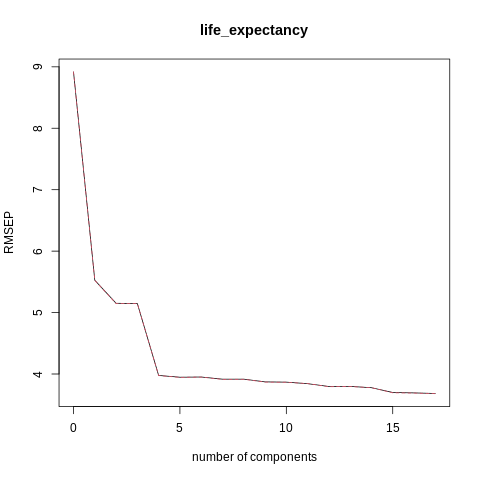

In [ ]:
%%R
validationplot(pcr_model)

***Scoring MODEL-1***

In [ ]:
%%R
prediction_pcr<-predict(pcr_model,x_test,ncomp=5)
pred1<-(prediction_pcr-y_test)^2
pred1<-pred1[,1]
acc1<-sqrt(mean(pred1))
acc1

[1] 3.97146


***Random Forest Regressor***

In [ ]:
%%R
rf_model <- randomForest(life_expectancy ~.,data = df2,ntree= 550, mtry=7,keep.forest=TRUE,importance=TRUE,proximity=TRUE)
rf_model


Call:
 randomForest(formula = life_expectancy ~ ., data = df2, ntree = 550,      mtry = 7, keep.forest = TRUE, importance = TRUE, proximity = TRUE) 
               Type of random forest: regression
                     Number of trees: 550
No. of variables tried at each split: 7

          Mean of squared residuals: 3.395723
                    % Var explained: 95.72


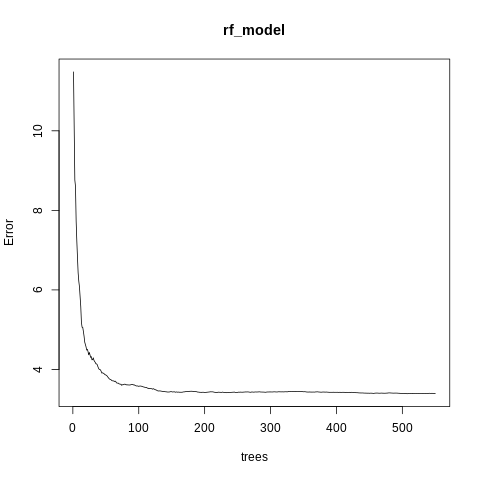

In [ ]:
%%R
plot(rf_model)

***Variable Importances for RF Model***

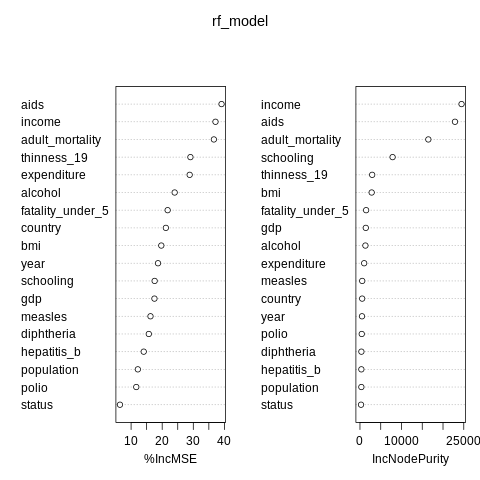

In [ ]:
%%R
varImpPlot(rf_model)

***Scoring MODEL-2***

In [ ]:
%%R
prediction_rf<-predict(rf_model,x_test)
pred2<-(prediction_rf - y_test)^2
pred2<-pred2[,1]
acc2<-sqrt(mean(pred2))
acc2

[1] 1.918315


***Changing the form of Data for Lasso Regression***

In [ ]:
%%R
x_train$status<-as.numeric(x_train$status)
x_test$status<-as.numeric(x_test$status)
x_train1<-as.matrix(select(x_train,-country))
x_test1<-as.matrix(select(x_test,-country))
y_train1<-as.matrix(y_train)
y_test1<-as.matrix(y_test)


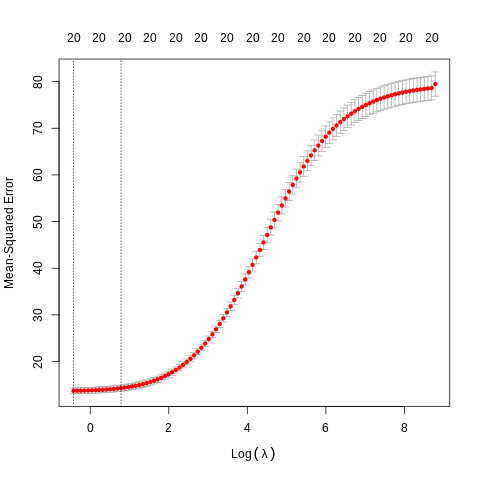

In [ ]:
%%R
lasso<-cv.glmnet(x_train1, y_train1,type.measure="mse",alpha=0,family="gaussian")
plot(lasso)

***Scoring MODEL-3***

In [ ]:
%%R
pred3<-predict(lasso,s=lasso$lambda.1se,newx=x_test1)
acc3<-sqrt(mean((y_test1-pred3)^2))
acc3

[1] 3.755294


***Final Comparision***

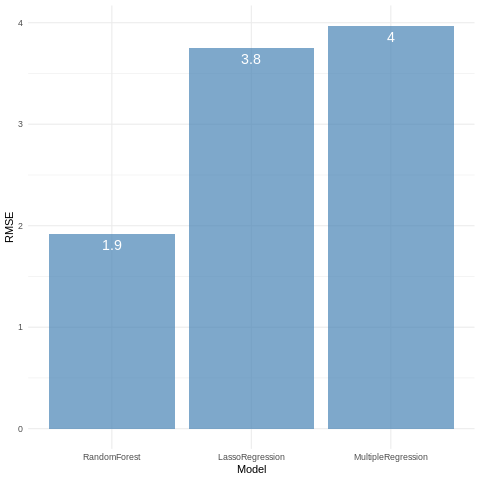

In [ ]:
%%R
comparision<-data.frame(model=c("MultipleRegression","RandomForest","LassoRegression"),
                        accuracy=c(acc1,acc2,acc3))

ggplot(data=comparision, aes(x=accuracy, y=reorder(model,accuracy))) +
  geom_bar(stat="identity", fill="steelblue",alpha=.7)+
  geom_text(aes(label=round(accuracy,1)), vjust=1.6, color="white", size=5)+
  theme_minimal()+ coord_flip() +ylab("Model") +xlab("RMSE")